In [76]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns

In [78]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [79]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [80]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [81]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [82]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [83]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [84]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [138]:
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [139]:
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
precip

[('2016-08-01', 0.08),
 ('2016-08-02', 0.05),
 ('2016-08-03', 0.0),
 ('2016-08-04', 0.04),
 ('2016-08-05', 0.01),
 ('2016-08-06', 0.0),
 ('2016-08-07', 0.39),
 ('2016-08-08', 0.02),
 ('2016-08-09', 0.0),
 ('2016-08-10', 0.0),
 ('2016-08-11', 0.0),
 ('2016-08-12', 0.0),
 ('2016-08-13', 0.0),
 ('2016-08-14', 0.0),
 ('2016-08-15', 0.0),
 ('2016-08-16', 0.0),
 ('2016-08-17', 0.0),
 ('2016-08-18', 0.0),
 ('2016-08-19', 0.04),
 ('2016-08-20', 0.0),
 ('2016-08-21', 0.12),
 ('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14

In [140]:
df = pd.DataFrame(precip, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)


In [141]:
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)


df = df.sort_values("date")

/Users/uknowconorhealy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """


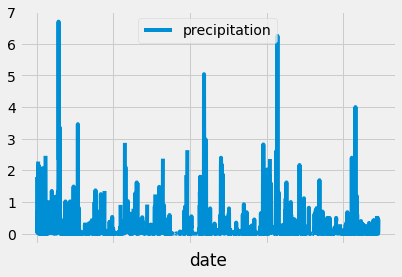

In [142]:
df.plot(x_compat=True)

In [143]:
precip_df= pd.DataFrame(results[0:], columns=['date', 'prcp'] )
precip_df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [144]:
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [145]:
session.query(Measurement.station).distinct(Measurement.station).count()

9

In [146]:
stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [152]:
highest_ob =session.query(Measurement.station).\
                group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
highest_ob

'USC00519281'

In [155]:
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == highest_ob).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

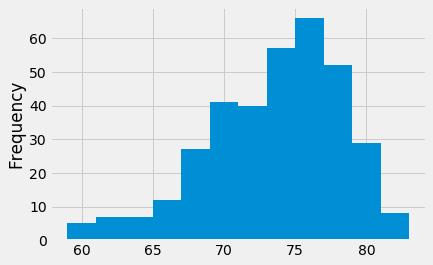

In [160]:
temp_df=pd.DataFrame(temp)
plt.hist(temp_df['tobs'],bins=12)
plt.ylabel("Frequency")
plt.show()

In [162]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [176]:
trip = calc_temps('2017-01-01','2018-01-01')
trip

[(58.0, 74.14387974230493, 87.0)]

In [180]:
df1 = pd.DataFrame(trip, columns=['tmin', 'tavg', 'tmax'])
df1

,tmin,tavg,tmax
0,58.0,74.14388,87.0


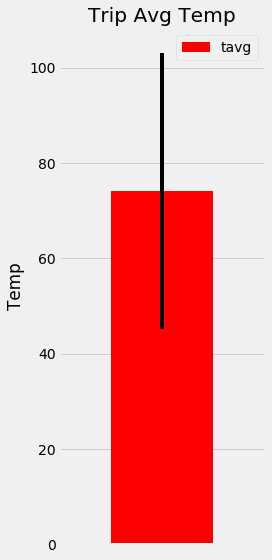

In [189]:
df1.plot.bar(y='tavg', 
             yerr=(df1['tmax'] - df1['tmin']), 
             title='Trip Avg Temp', 
             color='red', 
             alpha=1, 
             figsize=(4,8))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp")
plt.tight_layout()
plt.show()